# Customer service request analysis

In [82]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [83]:
custdata=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',header=0)

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [84]:
custdata.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [85]:
custdata.shape

(300698, 53)

In [86]:
custdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [87]:
custdata=custdata.drop(['School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location',
                       'Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name',
                       'Ferry Direction','Ferry Terminal Name','Landmark'],axis=1)

In [88]:
custdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [89]:
custdata=custdata.drop('Unique Key',axis=1)

In [90]:
custdata.shape

(300698, 40)

In [91]:
custdata['Agency'].unique()

array(['NYPD'], dtype=object)

In [92]:
custdata['Agency Name'].unique()

array(['New York City Police Department', 'NYPD',
       'Internal Affairs Bureau'], dtype=object)

In [93]:
custdata=custdata.drop(['Agency'],axis=1)

In [94]:
custdata['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [95]:
custdata['Descriptor'].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Double Parked Blocking Traffic', 'Vehicle', 'Loud Talking',
       'Banging/Pounding', 'Car/Truck Music', 'Tortured',
       'In Prohibited Area', 'Congestion/Gridlock', 'Neglected',
       'Car/Truck Horn', 'In Public', 'Other (complaint details)', nan,
       'No Shelter', 'Truck Route Violation', 'Unlicensed',
       'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant', 'Homeless

In [96]:
custdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Created Date                    300698 non-null  object 
 1   Closed Date                     298534 non-null  object 
 2   Agency Name                     300698 non-null  object 
 3   Complaint Type                  300698 non-null  object 
 4   Descriptor                      294784 non-null  object 
 5   Location Type                   300567 non-null  object 
 6   Incident Zip                    298083 non-null  float64
 7   Incident Address                256288 non-null  object 
 8   Street Name                     256288 non-null  object 
 9   Cross Street 1                  251419 non-null  object 
 10  Cross Street 2                  250919 non-null  object 
 11  Intersection Street 1           43858 non-null   object 
 12  Intersection Str

In [97]:
custdata=custdata.drop(['School Name','School Number','School Region','School Code','School Phone Number',
                       'School Address','School City','School State','School Zip','School Not Found'],axis=1)

In [98]:
custdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Created Date                    300698 non-null  object 
 1   Closed Date                     298534 non-null  object 
 2   Agency Name                     300698 non-null  object 
 3   Complaint Type                  300698 non-null  object 
 4   Descriptor                      294784 non-null  object 
 5   Location Type                   300567 non-null  object 
 6   Incident Zip                    298083 non-null  float64
 7   Incident Address                256288 non-null  object 
 8   Street Name                     256288 non-null  object 
 9   Cross Street 1                  251419 non-null  object 
 10  Cross Street 2                  250919 non-null  object 
 11  Intersection Street 1           43858 non-null   object 
 12  Intersection Str

# Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [99]:
custdata['Created Date']=pd.to_datetime(custdata['Created Date'])

In [100]:
custdata['Closed Date']=pd.to_datetime(custdata['Closed Date'])

In [101]:
custdata['Request_closing_time']=custdata['Closed Date']-custdata['Created Date']

In [102]:
custdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Created Date                    300698 non-null  datetime64[ns] 
 1   Closed Date                     298534 non-null  datetime64[ns] 
 2   Agency Name                     300698 non-null  object         
 3   Complaint Type                  300698 non-null  object         
 4   Descriptor                      294784 non-null  object         
 5   Location Type                   300567 non-null  object         
 6   Incident Zip                    298083 non-null  float64        
 7   Incident Address                256288 non-null  object         
 8   Street Name                     256288 non-null  object         
 9   Cross Street 1                  251419 non-null  object         
 10  Cross Street 2                  250919 non-n

In [103]:
custdata['Park Facility Name'].unique()

array(['Unspecified', 'Alley Pond Park - Nature Center'], dtype=object)

In [104]:
custdata.sample(5)

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location,Request_closing_time
58875,2015-11-03 09:07:00,2015-11-03 16:27:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10467.0,2937 CRUGER AVENUE,CRUGER AVENUE,ARNOW AVENUE,...,11 BRONX,BRONX,1021246.0,255918.0,Unspecified,BRONX,40.869033,-73.866236,"(40.8690327882247, -73.86623649443982)",0 days 07:20:00
43165,2015-11-18 06:32:04,2015-11-18 07:27:59,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11434.0,115-28 158 STREET,158 STREET,115 ROAD,...,12 QUEENS,QUEENS,1043315.0,189384.0,Unspecified,QUEENS,40.686295,-73.787028,"(40.68629502472696, -73.78702848289946)",0 days 00:55:55
109520,2015-09-18 10:02:02,2015-09-18 16:38:11,New York City Police Department,Animal Abuse,Neglected,Residential Building/House,11363.0,40-01 MORGAN STREET,MORGAN STREET,40 AVENUE,...,11 QUEENS,QUEENS,1056403.0,221474.0,Unspecified,QUEENS,40.774277,-73.739493,"(40.774276808743004, -73.73949304318548)",0 days 06:36:09
97001,2015-09-27 22:02:12,2015-09-28 00:56:10,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10040.0,97 ELLWOOD STREET,ELLWOOD STREET,WEST 196 STREET,...,12 MANHATTAN,MANHATTAN,1003827.0,253156.0,Unspecified,MANHATTAN,40.861508,-73.929225,"(40.861507758243285, -73.92922502137085)",0 days 02:53:58
219629,2015-06-13 21:29:51,2015-06-13 22:04:38,New York City Police Department,Traffic,Congestion/Gridlock,Street/Sidewalk,11374.0,65-54 AUSTIN STREET,AUSTIN STREET,65 ROAD,...,06 QUEENS,QUEENS,1023225.0,203672.0,Unspecified,QUEENS,40.725623,-73.859384,"(40.72562342971782, -73.8593844274502)",0 days 00:34:47


# Provide major insights/patterns that you can offer in a visual format (graphs or tables)

In [105]:
#different types of complaints
comp_type=custdata['Complaint Type'].value_counts()
comp_type=comp_type.to_frame()
comp_type=comp_type.rename(columns={'Complaint Type':'Counts'})

In [106]:
comp_type

,Counts
Blocked Driveway,77044
Illegal Parking,75361
Noise - Street/Sidewalk,48612
Noise - Commercial,35577
Derelict Vehicle,17718
Noise - Vehicle,17083
Animal Abuse,7778
Traffic,4498
Homeless Encampment,4416
Noise - Park,4042


In [107]:
#Converting the complaint type into percentage
comp_type['Percentage']=np.around((comp_type.Counts/comp_type.Counts.sum())*100,decimals=2)
comp_type

,Counts,Percentage
Blocked Driveway,77044,25.62
Illegal Parking,75361,25.06
Noise - Street/Sidewalk,48612,16.17
Noise - Commercial,35577,11.83
Derelict Vehicle,17718,5.89
Noise - Vehicle,17083,5.68
Animal Abuse,7778,2.59
Traffic,4498,1.50
Homeless Encampment,4416,1.47
Noise - Park,4042,1.34


In [109]:
# Keeping the major complaint types 
comp_type=comp_type[comp_type.Percentage>1.0]
comp_type=comp_type.reset_index()
comp_type=comp_type.rename(columns={'index':'Complaint Type'})
comp_type

,Complaint Type,Counts,Percentage
0,Blocked Driveway,77044,25.62
1,Illegal Parking,75361,25.06
2,Noise - Street/Sidewalk,48612,16.17
3,Noise - Commercial,35577,11.83
4,Derelict Vehicle,17718,5.89
5,Noise - Vehicle,17083,5.68
6,Animal Abuse,7778,2.59
7,Traffic,4498,1.50
8,Homeless Encampment,4416,1.47
9,Noise - Park,4042,1.34


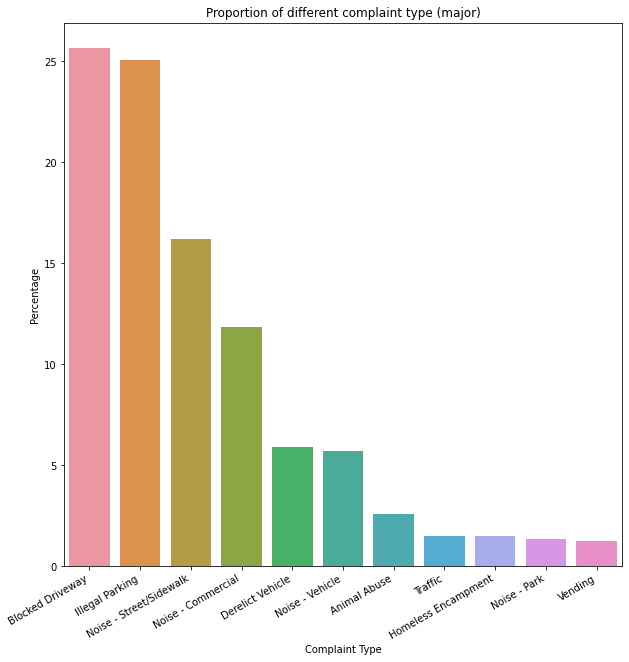

<Figure size 432x288 with 0 Axes>

In [115]:
#plotting the grpah of complaint types

plt.figure(figsize=(10,10))
comp_plot=sns.barplot(x=comp_type['Complaint Type'],y=comp_type.Percentage,data=comp_type)
comp_plot.set_xticklabels(comp_plot.get_xticklabels(),rotation=30,ha='right')
plt.title('Proportion of different complaint type (major)')
plt.show()
plt.tight_layout()


In [116]:
#Blocked driveway and illegal parking are the top 2 complaints recieved
#now we will see the same for other features like descriptor,location,city and address


In [142]:
desc_data=custdata['Descriptor'].value_counts()
desc_data=desc_data.to_frame()
desc_data=desc_data.rename(columns={'Descriptor':'Counts'})

In [143]:
desc_data

,Counts
Loud Music/Party,61430
No Access,56976
Posted Parking Sign Violation,22440
Loud Talking,21584
Partial Access,20068
With License Plate,17718
Blocked Hydrant,16081
Commercial Overnight Parking,12189
Car/Truck Music,11273
Blocked Sidewalk,11121


In [144]:
#Converting the description of complaints into percentage
desc_data['Percentage']=np.around((desc_data.Counts/desc_data.Counts.sum())*100,decimals=2)
desc_data

,Counts,Percentage
Loud Music/Party,61430,20.84
No Access,56976,19.33
Posted Parking Sign Violation,22440,7.61
Loud Talking,21584,7.32
Partial Access,20068,6.81
With License Plate,17718,6.01
Blocked Hydrant,16081,5.46
Commercial Overnight Parking,12189,4.13
Car/Truck Music,11273,3.82
Blocked Sidewalk,11121,3.77


In [145]:
desc_data=desc_data[desc_data.Percentage>2.0]
desc_data=desc_data.reset_index()
desc_data=desc_data.rename(columns={'index':'Descriptor'})
desc_data

,Descriptor,Counts,Percentage
0,Loud Music/Party,61430,20.84
1,No Access,56976,19.33
2,Posted Parking Sign Violation,22440,7.61
3,Loud Talking,21584,7.32
4,Partial Access,20068,6.81
5,With License Plate,17718,6.01
6,Blocked Hydrant,16081,5.46
7,Commercial Overnight Parking,12189,4.13
8,Car/Truck Music,11273,3.82
9,Blocked Sidewalk,11121,3.77


In [159]:
#Location Type
print(custdata['Location Type'].value_counts())
loc_data=custdata['Location Type'].value_counts()
loc_data=loc_data.to_frame()
loc_data=loc_data.rename(columns={'Location Type':'Counts'})
loc_data
loc_data['Percentage']=np.around((loc_data.Counts/loc_data.Counts.sum())*100,decimals=2)
loc_data
loc_data=loc_data[loc_data.Percentage>1.0]
loc_data=loc_data.reset_index()
loc_data=loc_data.rename(columns={'index':'Location Type'})
loc_data

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Terminal                           1
Park                               1
Ferry                              1
Name: Location Type, dtype: int64


,Location Type,Counts,Percentage
0,Street/Sidewalk,249299,82.94
1,Store/Commercial,20381,6.78
2,Club/Bar/Restaurant,17360,5.78
3,Residential Building/House,6960,2.32
4,Park/Playground,4773,1.59


In [161]:
#Address
add_data=custdata['Address Type'].value_counts()
add_data=add_data.to_frame()
add_data=add_data.rename(columns={'Address Type':'Counts'})
add_data
add_data['Percentage']=np.around((add_data.Counts/add_data.Counts.sum())*100,decimals=2)
add_data
add_data=add_data[add_data.Percentage>1.0]
add_data=add_data.reset_index()
add_data=add_data.rename(columns={'index':'Address Type'})
add_data



,Address Type,Counts,Percentage
0,ADDRESS,238644,80.11
1,INTERSECTION,43366,14.56
2,BLOCKFACE,12014,4.03
3,LATLONG,3509,1.18


In [171]:
#City
city_data=custdata['City'].value_counts()
city_data
city_data=city_data.to_frame()
city_data=city_data.rename(columns={'City':'Counts'})
city_data['Percentage']=np.around((city_data.Counts/city_data.Counts.sum())*100,decimals=2)
city_data
city_data=city_data[city_data.Percentage>1.0]
city_data=city_data.reset_index()
city_data=city_data.rename(columns={'index':'City'})
city_data

,City,Counts,Percentage
0,BROOKLYN,98307,32.98
1,NEW YORK,65994,22.14
2,BRONX,40702,13.65
3,STATEN ISLAND,12343,4.14
4,JAMAICA,7296,2.45
5,ASTORIA,6330,2.12
6,FLUSHING,5971,2.00
7,RIDGEWOOD,5163,1.73
8,CORONA,4295,1.44
9,WOODSIDE,3544,1.19


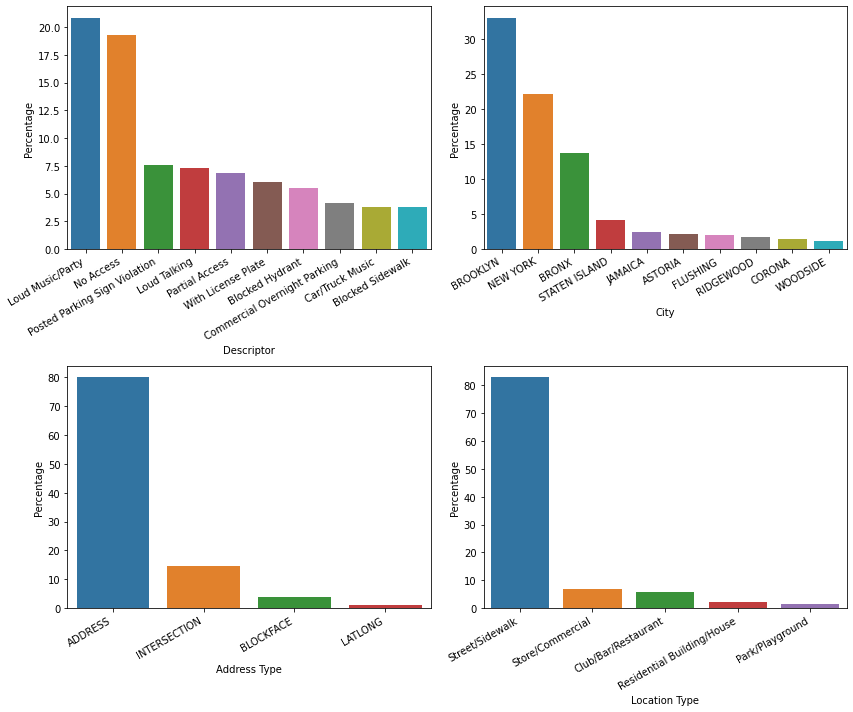

In [186]:
#plotting the graph of Descriptor,City,Address and Location
fig,ax=plt.subplots(2, 2, figsize=(12, 10))                                 

#ig, ax = plt.subplots(2, 2, figsize=(12, 10))
descriptor=sns.barplot(ax=ax[0,0],x=desc_data.Descriptor,y=desc_data.Percentage,data=desc_data)
descriptor.set_xticklabels(descriptor.get_xticklabels(), rotation=30, ha="right")

city=sns.barplot(ax=ax[0,1],x=city_data.City,y=city_data.Percentage,data=city_data)
city.set_xticklabels(city.get_xticklabels(),rotation=30,ha='right')

address=sns.barplot(ax=ax[1,0],x=add_data['Address Type'],y=add_data.Percentage,data=add_data)
address.set_xticklabels(address.get_xticklabels(),rotation=30,ha='right')

location=sns.barplot(ax=ax[1,1],x=loc_data['Location Type'],y=loc_data.Percentage,data=loc_data)
location.set_xticklabels(location.get_xticklabels(),rotation=30,ha='right')
plt.tight_layout()
                        

In [ ]:
#we can see from the graphs that Loud music/Party is the biggest complaint from the citizens
#Brooklyn faces the largest problem among all the cities
#Most of the complaints come from loaction Street/Sidewalk
#It seems most complaints come from the address

# Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [197]:
custdata['Request_closing_time'].head()

0   0 days 00:55:15
1   0 days 01:26:16
2   0 days 04:51:31
3   0 days 07:45:14
4   0 days 03:27:02
Name: Request_closing_time, dtype: timedelta64[ns]

In [196]:
#complaint_location_group=custdata.groupby('Location Type')[['Request_closing_time']].mean()

In [198]:
custdata['Request_closing_time'].describe()

count                       298534
mean     0 days 04:18:51.832782865
std      0 days 06:05:22.141833856
min                0 days 00:01:00
25%                0 days 01:16:33
50%         0 days 02:42:55.500000
75%                0 days 05:21:00
max               24 days 16:52:22
Name: Request_closing_time, dtype: object

In [ ]:
#First we will convert our Request_Closing_Time from days to number of hours.
#Since, converting 2:30 hours to timedelta64[h] will give 2 hours, hence we will add 1 and will say that this particular request was closed within 3 hours.
#Then we will find out the mean and standard distribution of the data.

In [203]:
custdata['Request_closing_hours']=custdata['Request_closing_time'].astype('timedelta64[h]')+1

In [205]:
custdata[['Request_closing_time','Request_closing_hours']]

,Request_closing_time,Request_closing_hours
0,0 days 00:55:15,1.0
1,0 days 01:26:16,2.0
2,0 days 04:51:31,5.0
3,0 days 07:45:14,8.0
4,0 days 03:27:02,4.0
...,...,...
300693,NaT,NaN
300694,0 days 02:00:31,3.0
300695,0 days 03:07:17,4.0
300696,0 days 04:05:33,5.0


In [216]:
custdata.shape

(300698, 31)

In [222]:
custdata.dropna(subset=['Request_closing_hours'],inplace=True)

In [224]:
custdata['Request_closing_hours'].isnull().sum()

0

In [223]:
custdata['Request_closing_hours'].tail()

300692    1.0
300694    3.0
300695    4.0
300696    5.0
300697    5.0
Name: Request_closing_hours, dtype: float64

In [239]:
mean = custdata['Request_closing_hours'].mean()
std = custdata['Request_closing_hours'].std()

print('Mean: ',mean)
print('Std: ',std)

Mean:  4.824009995511399
Std:  6.091285544795193


In [240]:
custdata['Request_closing_hours'].sort_values().tail()

12168     224.0
283132    337.0
21268     520.0
23664     578.0
244488    593.0
Name: Request_closing_hours, dtype: float64

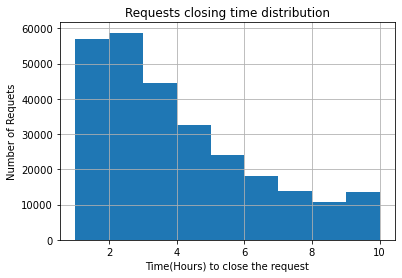

In [244]:
#some values in the dataset shows closing time more than 300 or 200 hours so they can be considered as outliers and can be removed
#We will convert the Request Closing time to normal z statistics and will remove any record having value more than 1.
#z-statistic = (value-mean)/std
#Next we will plot the histogram of our Request_Closing_Time.
plot_data = custdata[ ((custdata['Request_closing_hours']-mean)/std) < 1]
plot_data['Request_closing_hours'].hist(bins=9)
plt.xlabel('Time(Hours) to close the request')
plt.ylabel('Number of Requets')
plt.title('Requests closing time distribution')
plt.show()


In [ ]:
#Above distribution shows that around half of overall complaints were closed within 2 to 4 hours.


# Hypothesis testing
Whether the average response time across complaint types is similar or not (overall)